<a href="https://colab.research.google.com/github/Jacofeldman/Metodos1_JacoboFeldman/blob/main/Tarea3/Integral_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

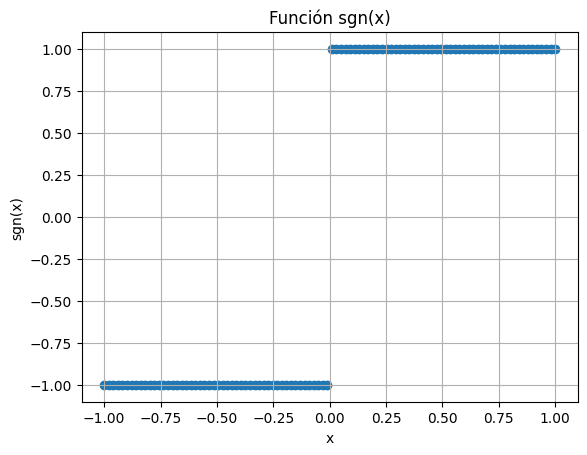

Nodos: [-8.47910486e-01 -7.24320291e-01 -5.70863665e-01  8.47910486e-01
 -3.94153352e-01 -2.01179864e-01 -3.21098526e-18 -2.97913025e-18
  2.01179864e-01  3.94153352e-01 -8.47910486e-01  5.70863665e-01
  7.24320291e-01  8.47910486e-01]
Pesos: [0.12994781 0.15632118 0.17890667 0.12994781 0.19365715 0.21050662
 0.2144372  0.2144372  0.21050662 0.19365715 0.12994781 0.17890667
 0.15632118 0.12994781]
[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [-1.         -0.97979798 -0.95959596 ...  0.95959596  0.97979798
   1.        ]
 [ 1.          0.94000612  0.88123661 ...  0.88123661  0.94000612
   1.        ]
 ...
 [ 1.         -0.40182049 -0.0841657  ... -0.0841657  -0.40182049
   1.        ]
 [-1.          0.40231659 -0.01452994 ...  0.01452994 -0.40231659
   1.        ]
 [ 1.         -0.38693906  0.10714602 ...  0.10714602 -0.38693906
   1.        ]]


<ipython-input-42-86bd7e857066>:61: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  c_n_1, _ = quad(integrando, -1, -0.1, limit=1000)  # Intervalo [-1, -0.1]
<ipython-input-42-86bd7e857066>:63: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  c_n_3, _ = quad(integrando, 0.1, 1, limit=1000)  # Intervalo [0.1, 1]
<ipython-input-42-86bd7e857066>:62: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  c_n_2, _ = quad(integrando, -0.1, 0.1, limit=1000)  # Intervalo [-0.1, 0.1]


Coeficientes: [ 0.00000000e+00  1.50000000e+00  5.20417043e-17 -8.73214249e-01
  6.24500451e-17  6.92410156e-01  0.00000000e+00 -5.70549844e-01
 -8.84708973e-17  5.46963134e-01 -3.64291930e-16 -4.18183465e-01
 -1.51788304e-16  5.15206462e-01 -4.02455846e-16 -2.78031409e-01
 -1.25940924e-15  5.55385223e-01 -1.79717352e-15 -1.14967329e-01
 -2.15815863e-15]
Aproximación con polinomios de Legendre: [-1.55501868 -0.87593614 -0.85923712 -0.99393981 -1.08154794 -1.08559369
 -1.0362322  -0.97649377 -0.93739005 -0.93105375 -0.9535947  -0.99184181
 -1.03031243 -1.05647282 -1.06360044 -1.05136734 -1.02470818 -0.99170243
 -0.96117351 -0.94056527 -0.93446015 -0.9439014  -0.96650552 -0.9972191
 -1.02949418 -1.05662636 -1.07301304 -1.0751352  -1.06213176 -1.03590983
 -1.00080577 -0.9628728  -0.92891529 -0.90541434 -0.89749405 -0.90806407
 -0.93724538 -0.98214727 -1.03701944 -1.09375838 -1.14270803 -1.1736628
 -1.17696104 -1.14454927 -1.07090238 -0.95370178 -0.79419981 -0.59723154
 -0.37087162 -0.1257

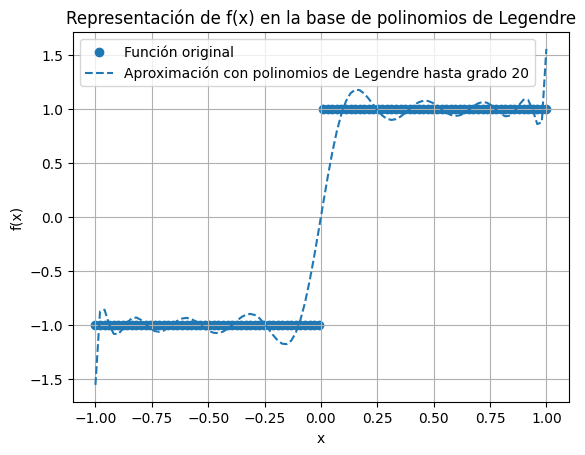

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import newton
from scipy.integrate import quad

def sgn(x):
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))
x = np.linspace(-1, 1, 100)
y = sgn(x)
plt.scatter(x, y)
plt.title('Función sgn(x)')
plt.xlabel('x')
plt.ylabel('sgn(x)')
plt.grid(True)
plt.show()

def polinomios_legendre(N, x):
    polinomios = [np.ones_like(x), x]

    for n in range(2, N+1):
        Pn = ((2*n - 1) * x * polinomios[n-1] - (n - 1) * polinomios[n-2]) / n
        polinomios.append(Pn)

    return np.array(polinomios)


def calcular_nodos_pesos(n):
    x = np.linspace(-1, 1, 100)
    Pn = polinomios_legendre(n, x)[n]  #
    dPn = np.gradient(Pn, x)
    nodos = []
    for i in range(1, n):
        nodo = newton(lambda xi: np.interp(xi, x, Pn), x[i * len(x) // n])
        nodos.append(nodo)
    nodos = np.array(nodos)
    pesos = 2 / ((1 - nodos**2) * np.interp(nodos, x, dPn)**2)

    return nodos, pesos


n = 15
nodos, pesos = calcular_nodos_pesos(n)

print("Nodos:", nodos)
print("Pesos:", pesos)
N = 20
polinomios = polinomios_legendre(N, x)
polinomios_array = np.array(polinomios)
print(polinomios)

def calcular_coeficientes_legendre(f, N, x):
    polinomios = polinomios_legendre(N, x)
    coeficientes = []

    for n in range(N + 1):

        integrando = lambda x: f(x) * np.interp(x, np.linspace(-1, 1, len(polinomios[n])), polinomios[n])


        c_n_1, _ = quad(integrando, -1, -0.1, limit=1000)  # Intervalo [-1, -0.1]
        c_n_2, _ = quad(integrando, -0.1, 0.1, limit=1000)  # Intervalo [-0.1, 0.1]
        c_n_3, _ = quad(integrando, 0.1, 1, limit=1000)  # Intervalo [0.1, 1]
        c_n = c_n_1 + c_n_2 + c_n_3
        c_n *= (2 * n + 1) / 2

        coeficientes.append(c_n)

    return np.array(coeficientes)

def combinacion_lineal_legendre(coeficientes, x):
    N = len(coeficientes) - 1
    polinomios = polinomios_legendre(N, x)

    f_x = sum(c_n * P_n for c_n, P_n in zip(coeficientes, polinomios))
    return f_x


coeficientes = calcular_coeficientes_legendre(sgn, N, x)
print("Coeficientes:", coeficientes)
f_x_legendre = combinacion_lineal_legendre(coeficientes, x)
print("Aproximación con polinomios de Legendre:", f_x_legendre)


plt.scatter(x,sgn(x), label='Función original')
plt.plot(x, f_x_legendre, label=f'Aproximación con polinomios de Legendre hasta grado {N}', linestyle='--')
plt.title(f'Representación de f(x) en la base de polinomios de Legendre')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()